# Download the Dataset

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzip the Dataset

In [18]:
!unzip /content/Flowers-Dataset.zip

Archive:  /content/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg 

# Image Augmentation

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [22]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [146]:
x_train=train_datagen.flow_from_directory(r"/content/flowers",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 8634 images belonging to 6 classes.


In [147]:
x_test=test_datagen.flow_from_directory(r"/content/flowers",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 8634 images belonging to 6 classes.


In [148]:
x_train.class_indices

{'daisy': 0,
 'dandelion': 1,
 'flowers': 2,
 'rose': 3,
 'sunflower': 4,
 'tulip': 5}

# Create Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [107]:
model=Sequential()

# Add Layers

**Convolution**

In [32]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

**MaxPooling**

In [33]:
model.add(MaxPooling2D(pool_size=(2,2)))

**Flatten**

In [34]:
model.add(Flatten())

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [57]:
32*(3*3*3+1)

896

**Hidden** **Layers**

In [37]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

**Output**

In [139]:
model.add(Dense(4,activation='softmax'))

# Compile The Model

In [140]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
len(x_train)

360

In [55]:
8634/24

359.75

# Fit The Model

In [150]:
model.fit

<bound method Model.fit of <keras.engine.sequential.Sequential object at 0x7f1116f22250>>

# Save The Model

In [66]:
ls

daisy/  dandelion/  flowers/  rose/  sunflower/  tulip/


In [67]:
model.save('flowers.h5')

In [68]:
ls

daisy/  dandelion/  flowers/  flowers.h5  rose/  sunflower/  tulip/


# Test The Model

In [69]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [70]:
model=load_model('flowers.h5')

In [86]:
img=image.load_img(r"/content/flowers/flowers/rose/10090824183_d02c613f10_m.jpg")

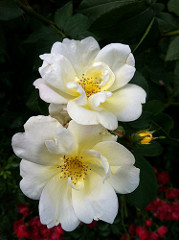

In [87]:
img

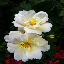

In [91]:
img=image.load_img(r"/content/flowers/flowers/rose/10090824183_d02c613f10_m.jpg",target_size=(64,64))
img

In [121]:
x=image.img_to_array(img)
x

array([[[120., 120., 108.],
        [ 97.,  87.,  88.],
        [109.,  99.,  98.],
        ...,
        [124., 136., 114.],
        [163., 172., 153.],
        [138., 143., 121.]],

       [[ 95.,  88.,  96.],
        [ 68.,  48.,  73.],
        [ 89.,  75.,  90.],
        ...,
        [132., 146., 133.],
        [112., 121., 104.],
        [113., 125., 105.]],

       [[ 89.,  76.,  94.],
        [ 83.,  70.,  87.],
        [ 83.,  77.,  87.],
        ...,
        [105., 104.,  99.],
        [112., 121., 104.],
        [105., 111.,  97.]],

       ...,

       [[ 22.,   7.,  38.],
        [ 23.,   8.,  39.],
        [ 22.,   3.,  31.],
        ...,
        [ 39.,  16.,  70.],
        [ 46.,  21.,  79.],
        [ 47.,  21.,  82.]],

       [[ 26.,  11.,  40.],
        [ 23.,   8.,  37.],
        [ 24.,  15.,  44.],
        ...,
        [ 38.,  17.,  73.],
        [ 42.,  18.,  76.],
        [ 45.,  19.,  80.]],

       [[ 24.,   8.,  37.],
        [ 26.,  10.,  39.],
        [ 26.,  

In [122]:
x=np.expand_dims(x,axis=0)
x

array([[[[120., 120., 108.],
         [ 97.,  87.,  88.],
         [109.,  99.,  98.],
         ...,
         [124., 136., 114.],
         [163., 172., 153.],
         [138., 143., 121.]],

        [[ 95.,  88.,  96.],
         [ 68.,  48.,  73.],
         [ 89.,  75.,  90.],
         ...,
         [132., 146., 133.],
         [112., 121., 104.],
         [113., 125., 105.]],

        [[ 89.,  76.,  94.],
         [ 83.,  70.,  87.],
         [ 83.,  77.,  87.],
         ...,
         [105., 104.,  99.],
         [112., 121., 104.],
         [105., 111.,  97.]],

        ...,

        [[ 22.,   7.,  38.],
         [ 23.,   8.,  39.],
         [ 22.,   3.,  31.],
         ...,
         [ 39.,  16.,  70.],
         [ 46.,  21.,  79.],
         [ 47.,  21.,  82.]],

        [[ 26.,  11.,  40.],
         [ 23.,   8.,  37.],
         [ 24.,  15.,  44.],
         ...,
         [ 38.,  17.,  73.],
         [ 42.,  18.,  76.],
         [ 45.,  19.,  80.]],

        [[ 24.,   8.,  37.],
       

In [123]:
y=np.argmax(model.predict(x),axis=1)

In [124]:
y

array([[[41, 41, 41],
        [43, 43, 41],
        [44, 44, 44],
        [39, 39, 48],
        [34, 49, 49],
        [42, 54, 54],
        [41, 60, 55],
        [54, 54, 53],
        [39, 39, 39],
        [60, 60, 60],
        [60, 61, 61],
        [41, 41, 41],
        [30, 30, 30],
        [30, 30, 33],
        [31, 32, 32],
        [55, 32, 55],
        [33, 32, 33],
        [32,  5, 31],
        [32, 31, 31],
        [31, 13, 15],
        [20, 20, 20],
        [30, 30, 18],
        [28, 10, 12],
        [27, 10, 10],
        [40, 40, 40],
        [45, 45, 16],
        [28, 28, 10],
        [28, 28, 26],
        [28, 28, 27],
        [28, 28, 28],
        [63, 61, 61],
        [56, 56, 60],
        [61, 61, 61],
        [61, 59, 61],
        [57, 57, 57],
        [57, 57, 57],
        [55, 55, 52],
        [54, 54, 59],
        [54, 54, 54],
        [54, 54, 54],
        [54, 54, 54],
        [19, 20, 20],
        [31, 31, 31],
        [16, 16, 16],
        [32, 17, 17],
        [5

In [125]:
x_train.class_indices

{'daisy': 0,
 'dandelion': 1,
 'flowers': 2,
 'rose': 3,
 'sunflower': 4,
 'tulip': 5}

In [126]:
index=['daisy','dandelion','flowers','rose','sunflower','tulip']

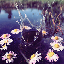

In [138]:
img=image.load_img(r"/content/flowers/flowers/daisy/10172379554_b296050f82_n.jpg",target_size=(64,64))
img